### Project: Data Exploration on Marijuana Arrests(D.C) & NYPD
### Name: Rajib Samanta
#### Overview
     According to the ACLU’s original analysis, marijuana arrests now account for over half of all drug arrests in the United States. Of the 8.2 million␣marijuana arrests between 2001 and 2010,88% were for simply having marijuana. Nationwide, the arrest data revealed one consistent trend: significant racial bias.Despite roughly equal usage rates, Blacks are 3.73 times more likely than whites to be arrested for marijuana.The laws related to the recreational use and possession of marijuana have changed at two milestones: the effective dates of the Marijuana Possession Decriminalization Amendment Act of 2014 on July 17, 2014, and of Initiative 71 on February 26, 2015 https://mpdc.dc.gov/marijuana.
     
#### Data Sources
-----------------
     API : Marijuana Arrests API query : https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/39/query?where=1%3D1&outFields=*&outSR=4326&f=json
     
     CSV : Link or Flat File uploaded: https://www.kaggle.com/code/utkarshx27/exploring-dc-marijuana-arrests-insights-trends/input
     
     NYPD Web: This is a breakdown of every arrest effected in NYC by the NYPD during the current year.
     
#### Description: 

    This data includes arrests made by the Metropolitan Police Department (MPD). The data represents individuals arrested with a marijuana charge, regardless of whether there was a more serious secondary charge.
     

In [316]:
# Load the Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import requests
from bs4 import BeautifulSoup
import urllib.request
from urllib.request import urlopen
import seaborn as sns

In [317]:
# Dataset -1
# Read in the Marijuana_Arrests dataset (given as a .csv file) from local:
directory = '/Users/rajibsamanta/Documents/Rajib/College/Sem5 2023/' 
# Set the working directory
os.chdir(directory)
print(os.getcwd())
dataset1_csv = pd.read_csv("Marijuana_Arrests.csv")
dataset1_csv.head()
# Display the DataFrame First 10 rows

/Users/rajibsamanta/Documents/Rajib/College/Sem5 2023


,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,OFFENSE_BLOCKX,OFFENSE_BLOCKY,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,CATEGORY,DESCRIPTION,ADDRESS,ARREST_BLOCKX,ARREST_BLOCKY,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,GLOBALID
0,Possession,Adult,2012,2012/01/01 06:00:00+00,b';\xc8k~\xa4iJ',20.0,5D,501.0,399700.0,137900.0,Out of State,Out of State,B,N,F,Narcotics,Ucsa Possession Marijuana,FLORIDA AVE NE,401400.0,136900.0,MARIJUANA_ARRESTS_1,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12481,{4654D30A-5B56-4E19-8FC2-B19CC723C747}
1,Possession,Adult,2012,2012/01/01 06:00:00+00,b';\xc8k~\xa4iJ',23.0,5D,501.0,399700.0,137900.0,Out of State,Out of State,B,N,M,Narcotics,Ucsa Possession Marijuana,FLORIDA AVE NE,401400.0,136900.0,MARIJUANA_ARRESTS_2,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12482,{1C0EBA86-27EC-4B8E-8ABB-6EFFF03A0AA2}
2,Possession,Adult,2012,2012/01/01 06:00:00+00,b't6\xa0\xac\xec`\xa4',46.0,7D,707.0,399700.0,130600.0,705,7D,B,N,M,Narcotics,Ucsa Possession Marijuana,3300 BLOCK OF BROTHERS PL SE,399700.0,130600.0,MARIJUANA_ARRESTS_3,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12483,{88080D68-CFA3-41E6-AA69-5DB7F950A134}
3,Possession,Adult,2012,2012/01/01 09:35:00+00,b'\xbe\x1d\xa7\xf5\xffWx',30.0,6D,605.0,403300.0,134500.0,605,6D,B,U,M,Narcotics,Ucsa Possession Marijuana,700 BLOCK OF 32ND ST SE,NaN,NaN,MARIJUANA_ARRESTS_4,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12484,{7769980A-5F36-4B3C-91CF-D1A3A94CE52E}
4,Possession with intent to distribute,Adult,2012,2012/01/02 19:40:00+00,b'\xbb\xc0\x8e\x94\x81\xac\xcd',29.0,6D,604.0,406400.0,135300.0,NaN,NaN,U,U,M,Narcotics,Ucsa Pwid Marijuana,5300 BLOCK OF B ST SE,NaN,NaN,MARIJUANA_ARRESTS_5,JLAY,2022/10/18 21:51:23+00,JLAY,2022/10/18 21:51:23+00,12485,{5D5BEE85-DF16-41A1-BB49-0D16D0EE1320}


In [318]:
# clean the dataset1
# Change Header
dataset1_csv = dataset1_csv.rename(columns={'OFFENSE_BLOCKX': 'OFFENSE_X-COORDINATE'})
dataset1_csv = dataset1_csv.rename(columns={'OFFENSE_BLOCKY': 'OFFENSE_Y-COORDINATE'})
dataset1_csv = dataset1_csv.rename(columns={'ARREST_BLOCKX': 'ARREST_X-COORDINATE'})
dataset1_csv = dataset1_csv.rename(columns={'ARREST_BLOCKY': 'ARREST_Y-COORDINATE'})
# Format data into a more readable format
# Convert the column to datetime format
dataset1_csv['DATETIME'] = pd.to_datetime(dataset1_csv['DATETIME'])
dataset1_csv['CREATED'] = pd.to_datetime(dataset1_csv['CREATED'])
dataset1_csv['EDITED'] = pd.to_datetime(dataset1_csv['EDITED'])
# Reformat the datetime values
dataset1_csv['DATETIME'] = dataset1_csv['DATETIME'].dt.strftime('%Y/%m/%d %H:%M:%S')
dataset1_csv['CREATED'] = dataset1_csv['CREATED'].dt.strftime('%Y/%m/%d %H:%M:%S')
dataset1_csv['EDITED'] = dataset1_csv['EDITED'].dt.strftime('%Y/%m/%d %H:%M:%S')
## From the below table we can see AGE is missing for 597 records,CCN,RACE,ETHNICITY & SEX is missing for 553 records
## We can remove these 553 records a insufficient records or bad data
# Remove rows with null values in column CCN,RACE,ETHNICITY & SEX
dataset1_csv = dataset1_csv.dropna(subset=['RACE'])
# Now remove the outlier
dataset1_csv = dataset1_csv[(dataset1_csv['AGE'] <= 70) & (dataset1_csv['AGE'] >= 10)] # using operator
dataset1_csv.shape

(12455, 27)

In [319]:
# Dataset -2
# This is a breakdown of every arrest effected in NYC by the NYPD during the current year.

# URL of the CSV file
csv_url = "https://data.cityofnewyork.us/api/views/uip8-fykc/rows.csv"

# Send a GET request to the CSV URL
response = requests.get(csv_url)

# Save response content to a file
with open("data.csv", "wb") as f:
    f.write(response.content)

print("Response content saved to data.csv")

# Read the CSV file into a pandas DataFrame
dataset2_csv_url = pd.read_csv("data.csv")

# Print the DataFrame
dataset2_csv_url.head()

Response content saved to data.csv


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,263238742,02/08/2023,380.0,"ROBBERY,CAR JACKING",105.0,ROBBERY,PL 1601003,F,K,62,0,25-44,F,WHITE,989904,156928,40.597407,-73.979638,POINT (-73.979638 40.597407)
1,265590985,03/24/2023,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,S,120,0,18-24,M,BLACK,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691)
2,265798132,03/28/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,S,120,0,25-44,M,BLACK,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691)
3,269233687,06/02/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,110,0,25-44,M,WHITE HISPANIC,1019164,210169,40.743481,-73.874004,POINT (-73.8740035373971 40.7434812638841)
4,270519574,06/28/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,25-44,M,BLACK HISPANIC,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)


In [320]:
# Clean dataset 3
# Remove rows with null values in column CCN,RACE,ETHNICITY & SEX
dataset2_csv_url = dataset2_csv_url.dropna(subset=['PD_CD'])

# add additional calculated column to calculate the year wise arrest data
dataset2_csv_url['ARREST_DATE'] = pd.to_datetime(dataset2_csv_url['ARREST_DATE'])  # Convert the column to datetime if not already done

# Extract the year from the datetime column
dataset2_csv_url['YEAR'] = dataset2_csv_url['ARREST_DATE'].dt.year
# Capitalize the first letter of each value in the 'Name' column
dataset2_csv_url['PD_DESC'] = dataset2_csv_url['PD_DESC'].str.capitalize()

dataset2_csv_url.shape

(112110, 20)

In [321]:
# Dataset -3
#      API : Marijuana Arrests API query
## The API Link of data:
##    https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/39/query?where=1%3D1&outFields=*&outSR=4326&f=json

def fetch_json_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch JSON data. Status Code: {response.status_code}")
        return None

if __name__ == "__main__":
    api_url = "https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Public_Safety_WebMercator/MapServer/39/query?where=1%3D1&outFields=*&outSR=4326&f=json"
    json_data = fetch_json_data(api_url)

    if json_data:
        # Print the JSON data
        #print(json_data
        # Convert JSON data to DataFrame
        features = json_data['features']
        data = [feature['attributes'] for feature in features]
        # Convert the extracted data to DataFrame
        dataset3_api = pd.DataFrame(data)
        # Set display options to show all columns
        pd.set_option('display.max_columns', None)

        # Display the DataFrame in table structure
        #rint(dataset3_api.head())  # Display the first few rows of the DataFrame
    else:
        print("Failed to fetch JSON data.")
dataset3_api.head()

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,OFFENSE_BLOCKX,OFFENSE_BLOCKY,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,CATEGORY,DESCRIPTION,ADDRESS,ARREST_BLOCKX,ARREST_BLOCKY,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,GLOBALID
0,Possession with intent to distribute,Adult,2012,1326236400000,b'\xea\x1d\xdf\xb3\xce\xc7\xcb',21,6D,603,403800.0,135500.0,708,7D,B,U,M,Narcotics,Ucsa Pwid Marijuana,2400 BLOCK OF ELVANS RD SE,401200.0,131700.0,MARIJUANA_ARRESTS_94,JLAY,1666129883000,JLAY,1666129883000,12574,{F9FF1E97-DDA1-4FB2-8F17-7D9FDEB7E5A0}
1,Possession with intent to distribute,Adult,2012,1326242700000,b'\xa7+\x1ews\xb6M',18,6D,602,405900.0,137900.0,602,6D,B,N,M,Narcotics,Ucsa Pwid Marijuana,4900 BLOCK OF QUARLES ST NE,405900.0,137900.0,MARIJUANA_ARRESTS_95,JLAY,1666129883000,JLAY,1666129883000,12575,{AE3E56E7-1B41-4B89-B890-B76D6FECDCB6}
2,Possession with intent to distribute,Adult,2012,1326246900000,b'o\xc6\x0c\xd3Y\t\xe8',28,6D,602,405900.0,136900.0,None,None,W,N,M,Narcotics,Ucsa Pwid Marijuana,800 BLOCK OF 49TH ST NE,405900.0,136900.0,MARIJUANA_ARRESTS_96,JLAY,1666129883000,JLAY,1666129883000,12576,{0B396388-76AA-4450-858F-FD34D6460F61}
3,Possession,Adult,2012,1326249000000,b'\xf1t\xdd\xfe\x80\x01w',56,7D,705,400700.0,130700.0,101,1D,B,N,F,Narcotics,Ucsa Possession Marijuana,10TH / ALABAMA AVE SE,NaN,NaN,MARIJUANA_ARRESTS_97,JLAY,1666129883000,JLAY,1666129883000,12577,{2D28FE03-9694-4A89-8483-8FB433DDA17A}
4,Possession,Adult,2012,1326250200000,b'\x8fR\xd8\xc0K\x1aO',30,5D,502,400400.0,139800.0,504,5D,B,U,M,Narcotics,Ucsa Possession Marijuana,2800 BLOCK OF 7TH ST NE,NaN,NaN,MARIJUANA_ARRESTS_98,JLAY,1666129883000,JLAY,1666129883000,12578,{46AD91A9-1360-4FCB-A32F-267E9EE31A40}


In [322]:
# clean the dataset3
# Change Header
dataset3_api = dataset3_api.rename(columns={'OFFENSE_BLOCKX': 'OFFENSE_X-COORDINATE'})
dataset3_api = dataset3_api.rename(columns={'OFFENSE_BLOCKY': 'OFFENSE_Y-COORDINATE'})
dataset3_api = dataset3_api.rename(columns={'ARREST_BLOCKX': 'ARREST_X-COORDINATE'})
dataset3_api = dataset3_api.rename(columns={'ARREST_BLOCKY': 'ARREST_Y-COORDINATE'})
# Format data into a more readable format
# Convert the column to datetime format
dataset3_api['DATETIME'] = pd.to_datetime(dataset3_api['DATETIME'])
dataset3_api['CREATED'] = pd.to_datetime(dataset3_api['CREATED'])
dataset3_api['EDITED'] = pd.to_datetime(dataset3_api['EDITED'])
# Reformat the datetime values
dataset3_api['DATETIME'] = dataset3_api['DATETIME'].dt.strftime('%Y/%m/%d %H:%M:%S')
dataset3_api['CREATED'] = dataset3_api['CREATED'].dt.strftime('%Y/%m/%d %H:%M:%S')
dataset3_api['EDITED'] = dataset3_api['EDITED'].dt.strftime('%Y/%m/%d %H:%M:%S')
dataset3_api['AGE'] = pd.to_numeric(dataset3_api['AGE'], errors='coerce')
# Make the 'DESCRIPTION' column all uppercase
dataset3_api['DESCRIPTION'] = dataset3_api['DESCRIPTION'].str.upper()
## From the below table we can see AGE is missing for 597 records,CCN,RACE,ETHNICITY & SEX is missing for 553 records
## We can remove these 553 records a insufficient records or bad data
# Remove rows with null values in column CCN,RACE,ETHNICITY & SEX
dataset3_api = dataset3_api.dropna(subset=['RACE'])
# Now remove the outlier
dataset3_api = dataset3_api[(dataset3_api['AGE'] <= 65) & (dataset3_api['AGE'] >= 10)] # using operator
dataset3_api.shape

(945, 27)

In [323]:
# List all the columns
dataset1_columns = dataset1_csv.columns.tolist()
dataset2_columns = dataset2_csv_url.columns.tolist()
dataset3_columns = dataset3_api.columns.tolist()
# Print the column names for dataset1 
print(dataset1_columns)

['TYPE', 'ADULT_JUVENILE', 'YEAR', 'DATETIME', 'CCN', 'AGE', 'OFFENSE_DISTRICT', 'OFFENSE_PSA', 'OFFENSE_X-COORDINATE', 'OFFENSE_Y-COORDINATE', 'DEFENDANT_PSA', 'DEFENDANT_DISTRICT', 'RACE', 'ETHNICITY', 'SEX', 'CATEGORY', 'DESCRIPTION', 'ADDRESS', 'ARREST_X-COORDINATE', 'ARREST_Y-COORDINATE', 'GIS_ID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED', 'OBJECTID', 'GLOBALID']


In [324]:
# Print the column names for dataset2
print(dataset2_columns)

['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column', 'YEAR']


In [325]:
# Print the column names for dataset3
print(dataset3_columns)

['TYPE', 'ADULT_JUVENILE', 'YEAR', 'DATETIME', 'CCN', 'AGE', 'OFFENSE_DISTRICT', 'OFFENSE_PSA', 'OFFENSE_X-COORDINATE', 'OFFENSE_Y-COORDINATE', 'DEFENDANT_PSA', 'DEFENDANT_DISTRICT', 'RACE', 'ETHNICITY', 'SEX', 'CATEGORY', 'DESCRIPTION', 'ADDRESS', 'ARREST_X-COORDINATE', 'ARREST_Y-COORDINATE', 'GIS_ID', 'CREATOR', 'CREATED', 'EDITOR', 'EDITED', 'OBJECTID', 'GLOBALID']


# Load each dataset into SQL Lite as an individual table

In [326]:
## Craete Table from dataframe dataset1_csv
import sqlite3
# Create or connect to an SQLite database
conn = sqlite3.connect('project_milestone5.db')

# Create an SQLite table from the DataFrame1
table_name = 'Marijuana_Arrests_tb1'
dataset1_csv.to_sql(table_name, conn, if_exists='replace', index=False)



12455

In [327]:
# Create an SQLite table from the DataFrame dataset2_csv_url
table_name = 'Marijuana_Arrests_tb2'
dataset2_csv_url.to_sql(table_name, conn, if_exists='replace', index=False)

112110

In [328]:
# Create an SQLite table from the DataFrame dataset3_api
table_name = 'Marijuana_Arrests_tb3'
dataset3_api.to_sql(table_name, conn, if_exists='replace', index=False)


945

In [329]:
conn.commit()
#c.close()
conn.close()

# Overview of individual table data

In [347]:
## Query the data from tables

conn = sqlite3.connect("project_milestone5.db") # Setup new connection for Database query
c = conn.cursor()

# Execute a query to fetch all rows from the table --> Marijuana_Arrests_tb1
c.execute("SELECT * FROM Marijuana_Arrests_tb1 LIMIT 2")
# Print column values
print(" Data from table Marijuana_Arrests_tb1 ")
print(" --------------------------------------")
# Fetch all rows from the query result
rows = c.fetchall()
for row in rows:
    print(row)


 Data from table Marijuana_Arrests_tb1 
 --------------------------------------
('Possession', 'Adult', 2012, '2012/01/01 06:00:00', "b';\\xc8k~\\xa4iJ'", 20.0, '5D', 501.0, 399700.0, 137900.0, 'Out of State', 'Out of State', 'B ', 'N ', 'F', 'Narcotics', 'Ucsa Possession Marijuana', 'FLORIDA AVE NE', 401400.0, 136900.0, 'MARIJUANA_ARRESTS_1', 'JLAY', '2022/10/18 21:51:23', 'JLAY', '2022/10/18 21:51:23', 12481, '{4654D30A-5B56-4E19-8FC2-B19CC723C747}')
('Possession', 'Adult', 2012, '2012/01/01 06:00:00', "b';\\xc8k~\\xa4iJ'", 23.0, '5D', 501.0, 399700.0, 137900.0, 'Out of State', 'Out of State', 'B ', 'N ', 'M', 'Narcotics', 'Ucsa Possession Marijuana', 'FLORIDA AVE NE', 401400.0, 136900.0, 'MARIJUANA_ARRESTS_2', 'JLAY', '2022/10/18 21:51:23', 'JLAY', '2022/10/18 21:51:23', 12482, '{1C0EBA86-27EC-4B8E-8ABB-6EFFF03A0AA2}')


In [348]:
# Execute a query to fetch all rows from the table --> Marijuana_Arrests_tb2
c.execute(f"SELECT * FROM Marijuana_Arrests_tb2 LIMIT 2")
# Print column values
print(" Data from table Marijuana_Arrests_tb2 ")
print(" --------------------------------------")
rows = c.fetchall()
for row in rows:
    print(row)


 Data from table Marijuana_Arrests_tb2 
 --------------------------------------
(263238742, '2023-02-08 00:00:00', 380.0, 'Robbery,car jacking', 105.0, 'ROBBERY', 'PL 1601003', 'F', 'K', 62, 0, '25-44', 'F', 'WHITE', 989904, 156928, 40.597407, -73.979638, 'POINT (-73.979638 40.597407)', 2023)
(265590985, '2023-03-24 00:00:00', 155.0, 'Rape 2', 104.0, 'RAPE', 'PL 1303001', 'F', 'S', 120, 0, '18-24', 'M', 'BLACK', 962873, 174172, 40.6447209438691, -74.0770327198983, 'POINT (-74.0770327198983 40.6447209438691)', 2023)


In [349]:
# Execute a query to fetch all rows from the table --> Marijuana_Arrests_tb2
c.execute(f"SELECT * FROM Marijuana_Arrests_tb3 LIMIT 2")
# Print column values
print(" Data from table Marijuana_Arrests_tb3 ")
print(" --------------------------------------")
rows = c.fetchall()
for row in rows:
    print(row)

 Data from table Marijuana_Arrests_tb3 
 --------------------------------------
('Possession with intent to distribute', 'Adult', 2012, '1970/01/01 00:22:06', "b'\\xea\\x1d\\xdf\\xb3\\xce\\xc7\\xcb'", 21.0, '6D', '603', 403800.0, 135500.0, '708', '7D', 'B ', 'U ', 'M', 'Narcotics', 'UCSA PWID MARIJUANA', '2400 BLOCK OF ELVANS RD SE', 401200.0, 131700.0, 'MARIJUANA_ARRESTS_94', 'JLAY', '1970/01/01 00:27:46', 'JLAY', '1970/01/01 00:27:46', 12574, '{F9FF1E97-DDA1-4FB2-8F17-7D9FDEB7E5A0}')
('Possession with intent to distribute', 'Adult', 2012, '1970/01/01 00:22:06', "b'\\xa7+\\x1ews\\xb6M'", 18.0, '6D', '602', 405900.0, 137900.0, '602', '6D', 'B ', 'N ', 'M', 'Narcotics', 'UCSA PWID MARIJUANA', '4900 BLOCK OF QUARLES ST NE', 405900.0, 137900.0, 'MARIJUANA_ARRESTS_95', 'JLAY', '1970/01/01 00:27:46', 'JLAY', '1970/01/01 00:27:46', 12575, '{AE3E56E7-1B41-4B89-B890-B76D6FECDCB6}')


In [350]:
# Close the cursor and connection
c.close()
conn.close()


In [ ]:
# Merge together the table data set

In [352]:
# Setup new connection for Database query
conn = sqlite3.connect("project_milestone5.db") 
cursor = conn.cursor()

In [353]:
# Define the new table name to consolidate the dataset1 and dataset3 as these two are for DC Marijuana Arrests
new_table_name = 'Marijuana_Arrests_tb_com'

# Create a new table using the CREATE TABLE AS statement
# Perform the FULL OUTER JOIN using LEFT JOIN, RIGHT JOIN, and UNION
## It will remove the duplicate from the data sets
create_table_query = '''
    CREATE TABLE Marijuana_Arrests_tb_com AS
    SELECT tb1.*
    FROM Marijuana_Arrests_tb1 tb1
    LEFT JOIN Marijuana_Arrests_tb3 tb3 ON tb1.OBJECTID = tb3.OBJECTID

    UNION

    SELECT tb3.*
    FROM Marijuana_Arrests_tb3 tb3
    LEFT JOIN Marijuana_Arrests_tb1 tb1 ON tb3.OBJECTID = tb1.OBJECTID
    WHERE tb1.OBJECTID IS NULL;
'''
# Check if the table exists before creating it
table_name = 'Marijuana_Arrests_tb_com'
check_table_query = f"SELECT name FROM sqlite_master WHERE type='table' AND name='{table_name}'"
existing_tables = cursor.execute(check_table_query).fetchall()

if not existing_tables:
    cursor.execute(create_table_query)

    # Commit the transaction
    conn.commit()
else:
    print(f"Table {table_name} already exists.")

# Execute a query to fetch all rows from the table --> Marijuana_Arrests_tb1
cursor.execute("SELECT count(1) FROM Marijuana_Arrests_tb_com ")
# Print column values
print(" Total row count table Marijuana_Arrests_tb_com ")
print(" --------------------------------------")
# Fetch all rows from the query result
rows = cursor.fetchall()
for row in rows:
    print(row[0]) # check table row count

cursor.execute("SELECT * FROM Marijuana_Arrests_tb_com ")
result = cursor.fetchall()
for row in result:
    print(row) # print 1 row
    break



Table Marijuana_Arrests_tb_com already exists.
 Total row count table Marijuana_Arrests_tb_com 
 --------------------------------------
12455
('Cultivation', 'Adult', 2019, '2019/05/29 22:50:00', 'efb222f3f71c5244', 18.0, '6D', 603.0, 404100.0, 135700.0, '603', '6D', 'B', 'N', 'M', 'Narcotics', 'Manufacture Or Possessing W/intent To Manufacture A Controlled Substance', 'UNIT BLOCK OF RIDGE ROAD SE', 404100.0, 135700.0, 'MARIJUANA_ARRESTS_11949', 'JLAY', '2022/10/18 21:51:23', 'JLAY', '2022/10/18 21:51:23', 24429, '{670084D5-4E8D-4ADE-8811-CFB6D1030EF8}')


# Create data frame using Panda library for data visualization

In [355]:
# Fetch all data from the table into a Pandas DataFrame
query = 'SELECT * FROM Marijuana_Arrests_tb_com;'
cleansed_data = pd.read_sql_query(query, conn)
cleansed_data.head()

,TYPE,ADULT_JUVENILE,YEAR,DATETIME,CCN,AGE,OFFENSE_DISTRICT,OFFENSE_PSA,OFFENSE_X-COORDINATE,OFFENSE_Y-COORDINATE,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,ETHNICITY,SEX,CATEGORY,DESCRIPTION,ADDRESS,ARREST_X-COORDINATE,ARREST_Y-COORDINATE,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,GLOBALID
0,Cultivation,Adult,2019,2019/05/29 22:50:00,efb222f3f71c5244,18.0,6D,603.0,404100.0,135700.0,603,6D,B,N,M,Narcotics,Manufacture Or Possessing W/intent To Manufact...,UNIT BLOCK OF RIDGE ROAD SE,404100.0,135700.0,MARIJUANA_ARRESTS_11949,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,24429,{670084D5-4E8D-4ADE-8811-CFB6D1030EF8}
1,Cultivation,Adult,2021,2021/11/10 01:00:00,46ee260ede6e4ee8,52.0,4D,401.0,397900.0,144700.0,401,4D,W,N,M,Narcotics,Cultivation Of A Controlled Substance,6600 BLOCK OF PINEY BRANCH ROAD NW,397900.0,144700.0,MARIJUANA_ARRESTS_12869,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,25349,{41E0ADD6-637B-4A03-84D2-CE7C972C4554}
2,Distribution,Adult,2012,2012/01/06 00:37:00,b'\x81\xc1\xd4\xf9y5\xd1',20.0,1D,103.0,399200.0,137600.0,507,5D,B,U,M,Narcotics,Ucsa Distributing Marijuana,BENNING RD NE,401700.0,136900.0,MARIJUANA_ARRESTS_36,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12516,{10F47861-A20A-4C91-8339-2AC656297432}
3,Distribution,Adult,2012,2012/01/06 01:21:00,b'za\xc2<w\xa8\xe4',34.0,7D,708.0,399200.0,129000.0,605,6D,B,U,M,Narcotics,Ucsa Distributing Marijuana,BENNING RD NE,401700.0,136900.0,MARIJUANA_ARRESTS_38,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12518,{87B510D3-0DA9-468F-8551-17CF01D7A898}
4,Distribution,Adult,2012,2012/01/07 20:17:00,b'\xd7\x9b\x83\x0f2\xaf%',24.0,6D,604.0,405500.0,135500.0,602,6D,B,U,F,Narcotics,Ucsa Distributing Marijuana,4600 BLOCK OF BENNING RD SE,405500.0,135500.0,MARIJUANA_ARRESTS_69,JLAY,2022/10/18 21:51:23,JLAY,2022/10/18 21:51:23,12549,{4854F923-08C0-4504-8D26-C384B78B19D1}


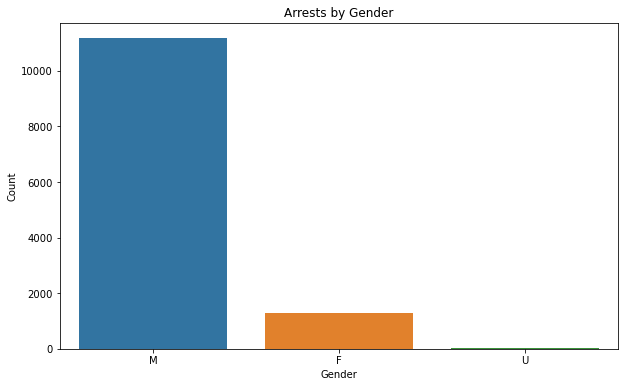

In [357]:
# Visualization 1: Bar Plot of Arrests by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=cleansed_data, x='SEX')
plt.title('Arrests by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Marijuana Arrests for male percentage is more than female

In [ ]:
# Visualization 2: Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=cleansed_data, x='AGE', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Marijuana Arrests for younger is more than older people. Majority are between age 20-30 years old.

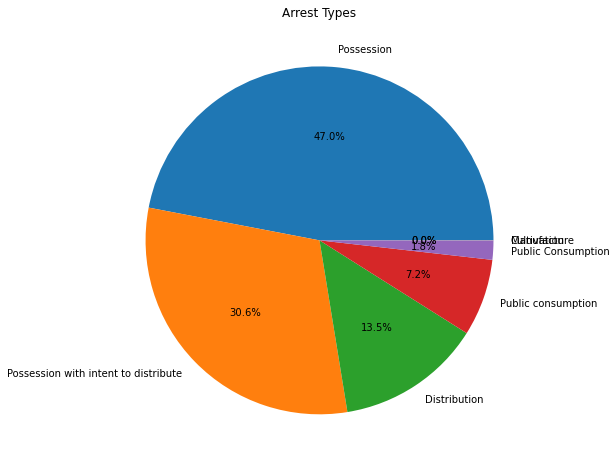

In [360]:

# Visualization 3: Pie Chart of Arrest Types
plt.figure(figsize=(8, 8))
arrest_type_counts = cleansed_data['TYPE'].value_counts()
plt.pie(arrest_type_counts, labels=arrest_type_counts.index, autopct='%1.1f%%')
plt.title('Arrest Types')
plt.show()



### Poeple are arrested mainly due to Marijuana Possession or Intent to distribute

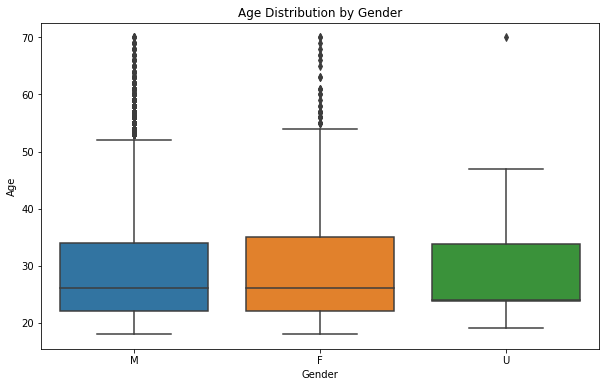

In [340]:
# Visualization 4: Box Plot of Age by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleansed_data, x='SEX', y='AGE')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


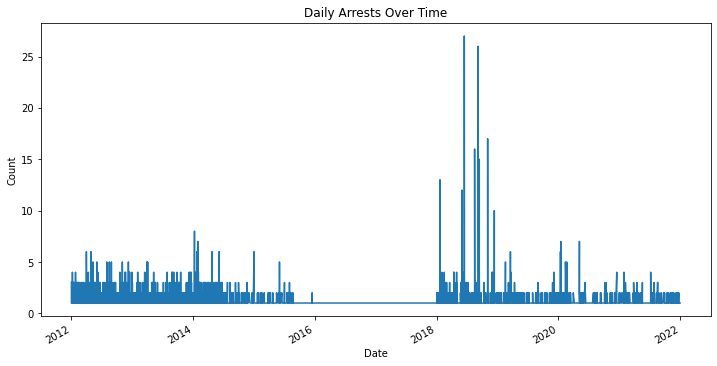

In [341]:

# Visualization 5: Time Series of Arrests by Date
cleansed_data['DATETIME'] = pd.to_datetime(cleansed_data['DATETIME'])
daily_arrests = cleansed_data.groupby('DATETIME').size()
plt.figure(figsize=(12, 6))
daily_arrests.plot()
plt.title('Daily Arrests Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

### Over the years Marijuana arrest has been reduced though looks like we dont have data for 2016 to 2018.

In [359]:
## Now create a new data set combining the DC and NYPD Arrest Data tables ( combining all dataset)

# Fetch all data from the table into a Pandas DataFrame
query = '''SELECT 'DC' SOURCE ,TYPE,YEAR,DATETIME ARREST_DATE,RACE,SEX ,DESCRIPTION FROM Marijuana_Arrests_tb_com
        UNION ALL
    SELECT 'NYPD' SOURCE ,PD_DESC TYPE,YEAR,ARREST_DATE,PERP_RACE RACE,PERP_SEX SEX,OFNS_DESC DESCRIPTION FROM Marijuana_Arrests_tb2 where OFNS_DESC == 'CANNABIS RELATED OFFENSES';
'''

combine_data = pd.read_sql_query(query, conn)
combine_data.head()



,SOURCE,TYPE,YEAR,ARREST_DATE,RACE,SEX,DESCRIPTION
0,DC,Cultivation,2019,2019/05/29 22:50:00,B,M,Manufacture Or Possessing W/intent To Manufact...
1,DC,Cultivation,2021,2021/11/10 01:00:00,W,M,Cultivation Of A Controlled Substance
2,DC,Distribution,2012,2012/01/06 00:37:00,B,M,Ucsa Distributing Marijuana
3,DC,Distribution,2012,2012/01/06 01:21:00,B,M,Ucsa Distributing Marijuana
4,DC,Distribution,2012,2012/01/07 20:17:00,B,F,Ucsa Distributing Marijuana


In [343]:
# Close the cursor and connection
cursor.close()
conn.close()

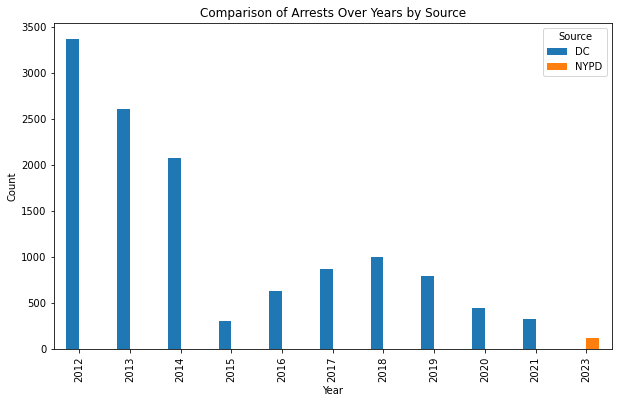

In [344]:
# Group data by year and source, then count the occurrences
yearly_counts = combine_data.groupby(['YEAR', 'SOURCE']).size().reset_index(name='COUNT')

# Pivot the data for plotting
pivot_data = yearly_counts.pivot(index='YEAR', columns='SOURCE', values='COUNT')

# Create a bar plot
pivot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Arrests Over Years by Source')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Source')
plt.show()

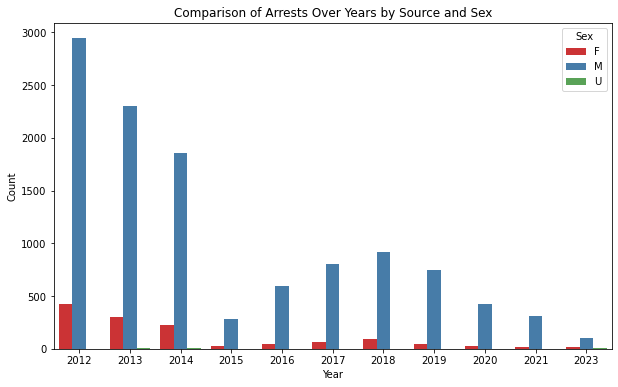

In [345]:
# Group data by year, source, and sex, then count the occurrences
yearly_counts = combine_data.groupby(['YEAR', 'SOURCE', 'SEX']).size().reset_index(name='COUNT')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_counts, x='YEAR', y='COUNT', hue='SEX', palette='Set1')
plt.title('Comparison of Arrests Over Years by Source and Sex')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()

#### We have limited data for NYPD arrest for CANNABIS RELATED OFFENSES only for 2023,  DC dont have 2023 arrest data. So we really can not compare.

# Summary
Analysis of arrest data provided by the Metropolitan Police Department (MPD) raises several red flags: What evidence are police officers using to obtain probable cause or reasonable suspicion to stop and search these people? Why are arrest rates highest in capitol neighborhoods? Are there financial incentives, in the form of federal funding, which reward high volumes of arrests for minor crimes? 
Here few observation

* Good news that over the period marijuana related arrest or offenses is reducing.
* Younger are mainly arrested for cannabis related offenses.
* Man is arrested more than female for Possession or Intent to distribute.
* Black people are still more likely to be arrested for marijuana possession than white people.


# Ethical implications
The above data dataset has been only used for study purpose and source is https://opendata.dc.gov/
* This data includes arrests made by the Metropolitan Police Department (MPD). The data represents individuals arrested with a marijuana charge, regardless of whether there was a more serious secondary charge.
* Race and ethnicity data are based on officer observation, which may or may not be accurate.
* Arrestee age is calculated based on the number of days between the self-reported or verified date of birth (DOB) of the arrestee and the date of the arrest. DOB data may not be accurate if selfreported or if the arrestee refused to provide it.
* This data may not match other marijuana data requests that may have included all law enforcement agencies in the district, or only the most serious charge.
* We don’t have sufficient data for NYPD marijuana arrest data to compare with DC marijuana arrest